In [47]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib

# Load and visualize data.

In [48]:
count = 0
coke_data = pd.read_csv('data/coke.csv', header=0, names = ['datadate', 'tic', 'cshtrd', 'prccd', 'prchd', 'prcld', 'prcod']).dropna()


In [49]:
# Process data.
coke_data['datadate'] = pd.to_datetime(coke_data['datadate'], format='%Y%m%d')
coke_data['prccd'] = pd.to_numeric(coke_data['prccd'])
coke_data['prcod'] = pd.to_numeric(coke_data['prcod'])
coke_data['prchd'] = pd.to_numeric(coke_data['prchd'])
coke_data['prcld'] = pd.to_numeric(coke_data['prcld'])
coke_data['cshtrd'] = pd.to_numeric(coke_data['cshtrd'])
coke_data

datadate   tic   cshtrd   prccd    prchd    prcld   prcod
3138 1 2006-01-03  COKE   9064.0   43.92   44.030   43.250   44.03
     1 2006-01-04  COKE   6771.0   44.10   44.280   43.340   44.00
     1 2006-01-05  COKE  13606.0   43.70   44.250   43.700   43.72
     1 2006-01-06  COKE  12612.0   43.50   44.110   43.500   43.50
     1 2006-01-09  COKE  11113.0   44.01   44.610   43.500   43.50
...           ...   ...      ...     ...      ...      ...     ...
     1 2021-10-11  COKE  22940.0  399.22  405.740  398.970  405.74
     1 2021-10-12  COKE  11375.0  400.20  403.010  398.970  399.22
     1 2021-10-13  COKE  11182.0  400.77  402.565  395.910  400.20
     1 2021-10-14  COKE  11894.0  397.45  404.000  396.721  404.00
     1 2021-10-15  COKE  16333.0  396.24  402.380  396.240  402.38

[3975 rows x 7 columns]

<AxesSubplot:title={'center':'Coke opening stock price from 2006-2021'}, xlabel='datadate'>

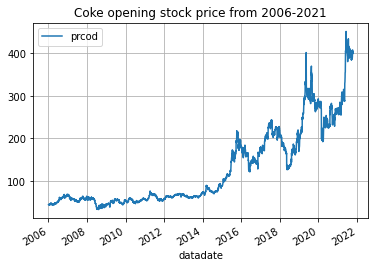

In [50]:
coke_data.plot('datadate', 'prcod', title='Coke opening stock price from 2006-2021', grid=True)

<AxesSubplot:title={'center':'Coke closing stock price from 2006-2021'}, xlabel='datadate'>

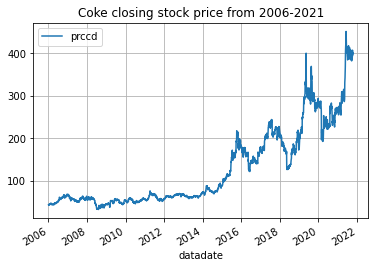

In [51]:
coke_data.plot('datadate', 'prccd', title='Coke closing stock price from 2006-2021', grid=True)

# Compute technical indicators.

In [52]:
#RSI, MACD, OBV, CCI, ADI
coke_data['rsi'] = talib.RSI(coke_data['prcod']) #default period of 14 days
coke_data['rsi'][:15]

3138  1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1          NaN
      1    40.638298
Name: rsi, dtype: float64

<AxesSubplot:title={'center':'Relative Strength Index 2006-2021'}, xlabel='datadate'>

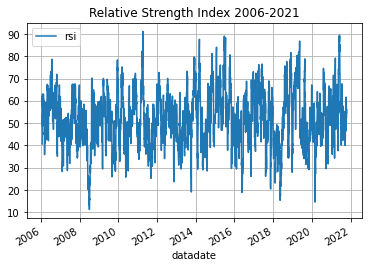

In [53]:
coke_data.plot('datadate', 'rsi', title='Relative Strength Index 2006-2021', grid=True)

In [54]:
coke_data['macd'], coke_data['macdsignal'], coke_data['macdhist'] = talib.MACD(coke_data['prccd']) # defaults: fastperiod=12, slowperiod=26, signalperiod=9

<AxesSubplot:title={'center':'Moving Average Convergence/Divergence 2006-2021'}, xlabel='datadate'>

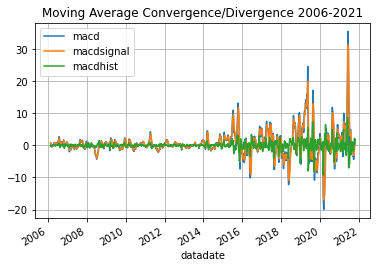

In [55]:
coke_data.plot('datadate', ['macd', 'macdsignal', 'macdhist'], title='Moving Average Convergence/Divergence 2006-2021', grid=True)

<AxesSubplot:title={'center':'On-Balance Volume 2006-2021'}, xlabel='datadate'>

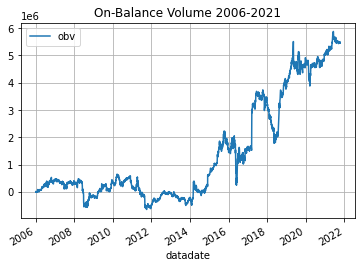

In [56]:
coke_data['obv'] = talib.OBV(coke_data['prccd'], coke_data['cshtrd'])
coke_data.plot('datadate', 'obv', title='On-Balance Volume 2006-2021', grid=True)

<AxesSubplot:title={'center':'Commodity Channel Index 2006-2021'}, xlabel='datadate'>

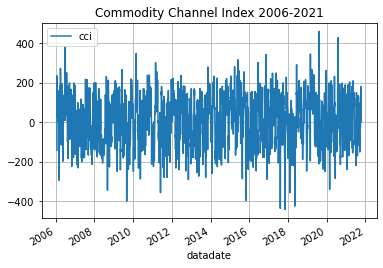

In [57]:
coke_data['cci'] = talib.CCI(coke_data['prchd'], coke_data['prcld'], coke_data['prccd']) #default period: 14 days
coke_data.plot('datadate', 'cci', title='Commodity Channel Index 2006-2021', grid=True)

<AxesSubplot:title={'center':'Average Directional Index 2006-2021'}, xlabel='datadate'>

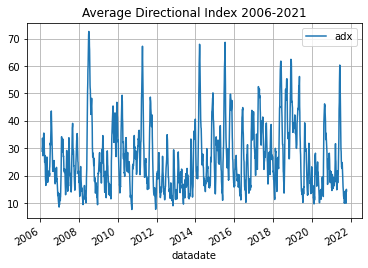

In [58]:
coke_data['adx'] = talib.ADX(coke_data['prchd'], coke_data['prcld'], coke_data['prccd']) #default period: 14 days
coke_data.plot('datadate', 'adx', title='Average Directional Index 2006-2021', grid=True)